# <p style="background-color:#0F83D6;font-family:newtimeroman;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">💊 Clasificación De Medicamentos 💊</p>
---

[![Clasificaci-n-Medicamentos.png](https://i.postimg.cc/nh5Sjsj0/Clasificaci-n-Medicamentos.png)](https://postimg.cc/nX4GNh1D)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#sec_1">Introducción</a>  
2. <a href="#sec_2">Exploración del set de datos</a>  
3. <a href="#sec_3">Creación de variables dummy y uso de pipeline</a>  
4. <a href="#sec_4">Pre-selección de variables</a>  
5. <a href="#sec_5">Balance(under, over sampling o smote)</a>
6. <a href="#sec_6">Modelos de Clasificación</a>  
7. <a href="#sec_7">Métricas de desempeño</a> 
8. <a href="#sec_8">Conclusiones y Recomendaciones</a>     

 
</font>
</div>

<a id='sec_1'></a>  
## `1. Introducción`  

`💊 Explorando la Clasificación de Medicamentos 💊`

En el ámbito de la salud, la correcta clasificación de los medicamentos y su relación con diversos factores clínicos es esencial para un tratamiento efectivo. 🩺 Este proyecto se adentra en un conjunto de datos que contiene información clave para la clasificación de medicamentos en función de características como la **edad** del paciente 👶👵, el **sexo** 👨👩, la **presión arterial** (BP) 💓, los niveles de **colesterol** 🧴, la relación **Na/K** 🧪, y el **tipo de medicamento** (Drug) 💊.

Con esta valiosa información, buscamos optimizar la clasificación de medicamentos y ofrecer una herramienta poderosa para personalizar tratamientos, mejorando la eficacia clínica y reduciendo los riesgos asociados. 💡💊



**1.2. Recursos disponibles**
- [Set de datos Medicamentos](data/drug200.csv)

**1.3. Diccionario de datos disponibles**

| **Clave**      | **Descripción**                                               | **Tipo de dato** |
|----------------|---------------------------------------------------------------|------------------|
| Age            | Edad del paciente (en años)                                    | Int              |
| Sex            | Sexo del paciente (Male o Female)                              | Object           |
| BP             | Presión arterial del paciente (Low, Normal, High)             | Object           |
| Cholesterol    | Nivel de colesterol (Normal, High) | Object           |
| Na_to_K        | Relación entre sodio y potasio en el cuerpo (Na/K)             | Float            |
| Drug           | Tipo de medicamento prescrito (Categoría de clasificación)    | Tarjet           |


<a id='sec_2'></a>
## `2. Exploración del set de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Verificar si hay datos faltantes y valores duplicados
5. Identificar los principales atributos y eliminar los atributos inncesarios
6. Exploración de columnas categóricos

**2.1 Leer el set de datos**

In [519]:
import pandas as pd

In [520]:
df = pd.read_csv("data/drug200.csv")
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**2.2 Entender tamaño, columnas y filas del set de datos**

In [521]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 200
El número de columnas es: 6


**2.3 Entender qué tipos de datos tenemos en cada columna**

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int` , `float` y `Object`.
>- Al poder observar a mas detalle se tiene en cantida de tipo de dato `float64(1)`, `int64(1)`, `object(4)`

**2.4 Verificar si hay datos faltantes y valores duplicados**

In [523]:
df.duplicated().sum()

0

>**Observación**
> - Al observar se pudo evidenciar que  `no hay valores duplicados`.

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


>**Observación**
> - Al observar se pudo evidenciar que `no hay valores faltantes` en el dataset.

**Identificar los principales atributos y eliminar los atributos inncesarios**

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


>**Observación**
> - `No se realizo ninguna eliminación` de ningun atributo.

**2.6 Exploración de columnas categóricos**

In [526]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

>**Obervación**
>- No se encontro valores diferentes y solo hay 2 valores y son `M y F`

In [527]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

>**Obervación**
>- No se encontro valores diferentes y solo hay 3 valores y son `HIGH, LOW y NORMAL`

In [528]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

>**Obervación**
>- No se encontro valores diferentes y solo hay 2 valores y son `HIGH y NORMAL`

In [529]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

>**Obervación**
>- Se observa que los valores estan en minúscula y se debe llevar a un estandar y ser todo `mayúscula`

In [530]:
df['Drug'] =  df['Drug'].str.upper()

In [531]:
df['Drug'].value_counts()

Drug
DRUGY    91
DRUGX    54
DRUGA    23
DRUGC    16
DRUGB    16
Name: count, dtype: int64

>**Observación**
>- Se realizo correctamente el cambio de `minúscula a mayúscula`

In [532]:
df.select_dtypes(include = "object").columns.to_list()

['Sex', 'BP', 'Cholesterol', 'Drug']

<a id='sec_3'></a>
## `3. Creación de variables dummy y uso de pipeline`

Esta etapa consiste en transformar variables categóricas y generar nuevas características para enriquecer el modelo.

1. Variables dummy 🧩:
2. Uso de Pipeline ✨:

**3.1 Variables dummy 🧩**

In [533]:
columnas = ['Sex']

In [534]:
for col in columnas:
    dummies = pd.get_dummies(df[col], drop_first = True, dtype = int)

    dummies.rename(columns={dummies.columns.to_list()[0]: f'Dummy_{col}'}, inplace=True)

    df = pd.concat([df, dummies], axis=1)

    df = df.drop(columns = col)

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   BP           200 non-null    object 
 2   Cholesterol  200 non-null    object 
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    object 
 5   Dummy_Sex    200 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 8.7+ KB


**3.2 Uso de Pipeline ✨**

In [536]:
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [537]:
cat_columnas_ordinal = ['BP', 'Cholesterol']

In [538]:
# Transformadores ordinales
ordinal_encoder = OrdinalEncoder()

imputer_categoricas = SimpleImputer(strategy='most_frequent')

In [539]:
col_transformer = make_column_transformer(
    (make_pipeline(imputer_categoricas, ordinal_encoder), cat_columnas_ordinal),
    remainder='passthrough'
)
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['BP', 'Cholesterol'])])

In [540]:
col_transformer.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['BP', 'Cholesterol'])])

In [541]:
aux = col_transformer.transform(df)
df_procesado = pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pipeline__BP           200 non-null    object
 1   pipeline__Cholesterol  200 non-null    object
 2   remainder__Age         200 non-null    object
 3   remainder__Na_to_K     200 non-null    object
 4   remainder__Drug        200 non-null    object
 5   remainder__Dummy_Sex   200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [542]:
df_procesado.columns

Index(['pipeline__BP', 'pipeline__Cholesterol', 'remainder__Age',
       'remainder__Na_to_K', 'remainder__Drug', 'remainder__Dummy_Sex'],
      dtype='object')

In [543]:
df_procesado.columns = df_procesado.columns.str.split('__').str[-1]
df_procesado.columns.to_list()

['BP', 'Cholesterol', 'Age', 'Na_to_K', 'Drug', 'Dummy_Sex']

In [544]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BP           200 non-null    object
 1   Cholesterol  200 non-null    object
 2   Age          200 non-null    object
 3   Na_to_K      200 non-null    object
 4   Drug         200 non-null    object
 5   Dummy_Sex    200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


<a id='sec_4'></a>
## `4. Pre-selección de variables`

El objetivo de esta fase es poder divir en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.

- `|Train:|` El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

- `|Test:|` El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

1. División del dataset de datos

In [545]:
X = df_procesado.drop(columns=['Drug'])
y = df_procesado['Drug']

In [546]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [547]:
print(f"Tamaño del total de datos: {len(df_procesado)}")
print(f"Tamaño de train: {len(X_train)}")
print(f"Tamaño de test: {len(X_test)}")

Tamaño del total de datos: 200
Tamaño de train: 160
Tamaño de test: 40


<a id='sec_5'></a>
## `5. Balance(under, over sampling o smote)`

El objetivo de esta fase es poder balancear nuestra da, SMOTE genera nuevas muestras sintéticas para la clase minoritaria, lo que ayuda a balancear las clases.

1. Uso de SMOTE

In [548]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [549]:
from collections import Counter

print('Distribución original de clases:', Counter(y_train))
print('Distribución de clases después de SMOTE:', Counter(y_train_balanced))

Distribución original de clases: Counter({'DRUGY': 76, 'DRUGX': 43, 'DRUGA': 17, 'DRUGB': 13, 'DRUGC': 11})
Distribución de clases después de SMOTE: Counter({'DRUGX': 76, 'DRUGY': 76, 'DRUGC': 76, 'DRUGA': 76, 'DRUGB': 76})


<a id='sec_6'></a>
## `6. ModeloS de Clasificación`

En este caso debemos de utilizar 4 modelos, el cual luego se evaluará sus meétricas de desempeño.

Etapas:

1. Modelo Logistic Regression 
2. Modelo DecisionTreeClassifier
3. Modelo RandomForestClassifier
4. Modelo KNeighborsClassifier

**6.1 Modelo Logistic Regression**

In [550]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [551]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [552]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100)


In [553]:
model.fit(X_train, y_train_balanced)


LogisticRegression(multi_class='multinomial')

In [554]:
y_pred = model.predict(X_test)


In [555]:
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.95
Reporte de clasificación:
               precision    recall  f1-score   support

       DRUGA       0.86      1.00      0.92         6
       DRUGB       1.00      1.00      1.00         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       1.00      0.91      0.95        11
       DRUGY       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.95      0.95      0.95        40



In [556]:
cm_rl = confusion_matrix(y_test, y_pred)

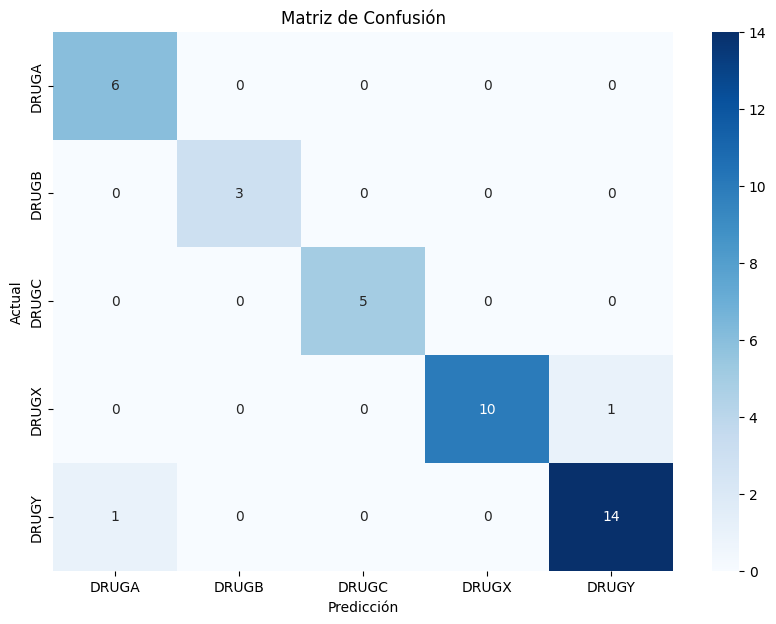

In [557]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rl, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

**Modelo Árbol de Decisión**

In [558]:
from sklearn.tree import DecisionTreeClassifier

In [559]:
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train_balanced)
y_pred_tree = tree_model.predict(X_test)

In [560]:
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_tree))

Precisión del Árbol de Decisión: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

       DRUGA       1.00      1.00      1.00         6
       DRUGB       1.00      1.00      1.00         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       1.00      1.00      1.00        11
       DRUGY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [561]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

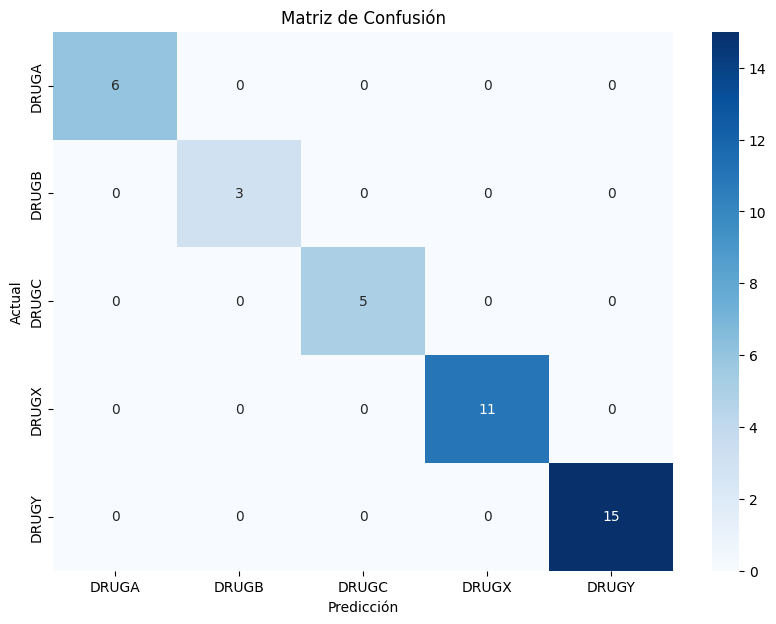

In [562]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

**Random Forest**

In [563]:
from sklearn.ensemble import RandomForestClassifier

In [564]:
rf_model = RandomForestClassifier(random_state=42)

In [565]:
rf_model.fit(X_train, y_train_balanced)

RandomForestClassifier(random_state=42)

In [566]:
y_pred_rf = rf_model.predict(X_test)

In [567]:
print("Precisión del Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))

Precisión del Random Forest: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

       DRUGA       1.00      1.00      1.00         6
       DRUGB       1.00      1.00      1.00         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       1.00      1.00      1.00        11
       DRUGY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [571]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

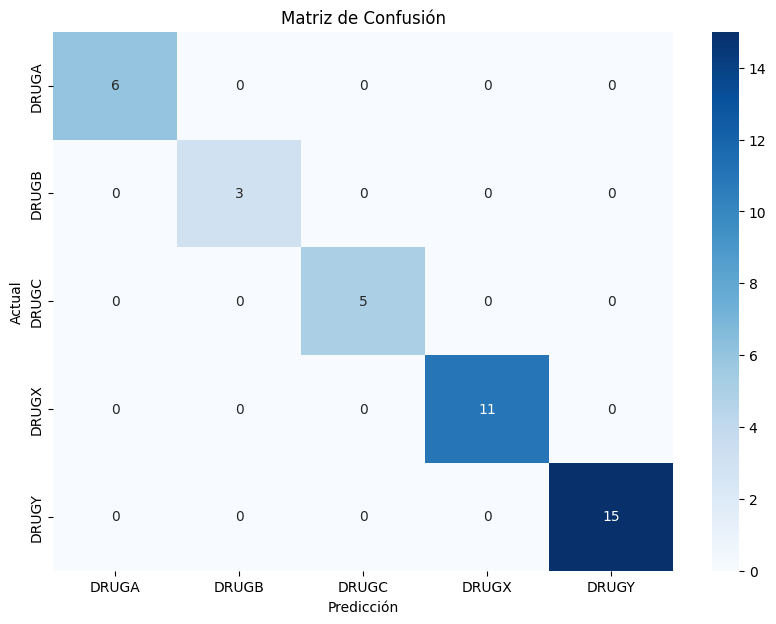

In [572]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

**Modelo KNN**

In [568]:
from sklearn.neighbors import KNeighborsClassifier

In [569]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_balanced)
y_pred_knn = knn_model.predict(X_test)

In [570]:
print("Precisión del KNN:", accuracy_score(y_test, y_pred_knn))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))

Precisión del KNN: 0.9
Reporte de clasificación:
               precision    recall  f1-score   support

       DRUGA       0.75      1.00      0.86         6
       DRUGB       0.75      1.00      0.86         3
       DRUGC       1.00      1.00      1.00         5
       DRUGX       0.91      0.91      0.91        11
       DRUGY       1.00      0.80      0.89        15

    accuracy                           0.90        40
   macro avg       0.88      0.94      0.90        40
weighted avg       0.92      0.90      0.90        40



In [573]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

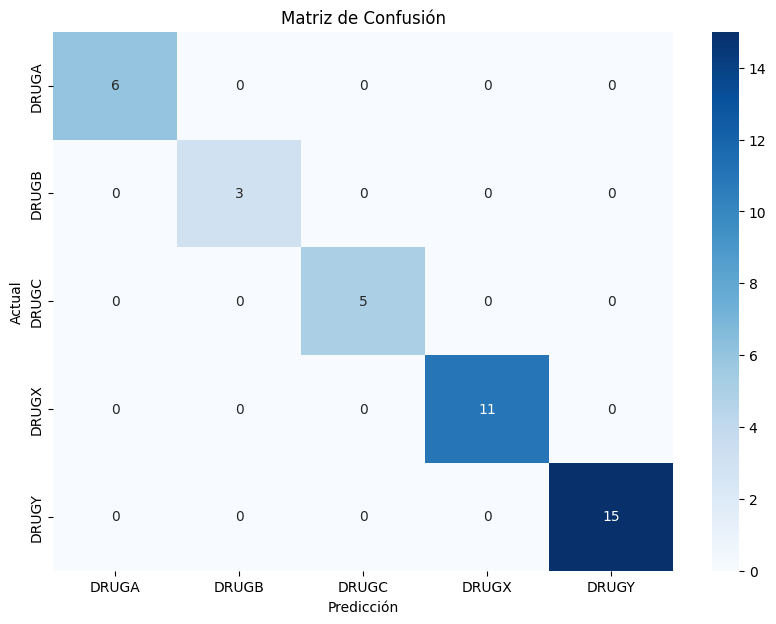

In [574]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()